In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

In [3]:
df_data_test=pd.read_csv(r"test set values.csv",index_col='id')
df_data1=pd.read_csv(r"training set values.csv",index_col='id')
df_data2=pd.read_csv(r"training set labels.csv",index_col='id')

In [4]:
df_data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14850 entries, 50785 to 68707
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14850 non-null  float64
 1   date_recorded          14850 non-null  object 
 2   funder                 13981 non-null  object 
 3   gps_height             14850 non-null  int64  
 4   installer              13973 non-null  object 
 5   longitude              14850 non-null  float64
 6   latitude               14850 non-null  float64
 7   wpt_name               14850 non-null  object 
 8   num_private            14850 non-null  int64  
 9   basin                  14850 non-null  object 
 10  subvillage             14751 non-null  object 
 11  region                 14850 non-null  object 
 12  region_code            14850 non-null  int64  
 13  district_code          14850 non-null  int64  
 14  lga                    14850 non-null  object 
 15

In [4]:
df_data_test=df_data_test.drop('date_recorded',axis=1)
df_data_test=df_data_test.drop('recorded_by',axis=1)


In [5]:
df_data_test.isnull().sum()

id                          0
amount_tsh                  0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source    

In [6]:
#limpieza de datos, lo que hago es sustituirlo por la moda.
df_data_test['funder'] = df_data_test['funder'].replace(np.nan, 'desconocido')
df_data_test['installer'] = df_data_test['installer'].replace(np.nan, 'DWE')
df_data_test['subvillage'] = df_data_test['subvillage'].replace(np.nan,'Madukani')
#df_data_test['public_meeting'] = df_data_test['public_meeting'].replace(np.nan,'True')
df_data_test['scheme_management'] = df_data_test['scheme_management'].replace(np.nan,'VWC')
df_data_test['scheme_name'] = df_data_test['scheme_name'].replace(np.nan,'K')
#df_data_test['permit'] = df_data_test['permit'].replace(np.nan,'False')
df_data_test['permit'].fillna(method='ffill', inplace=True)
df_data_test['public_meeting'].fillna(method='ffill', inplace=True)

In [7]:
df_data_test.permit.value_counts()


True     10262
False     4588
Name: permit, dtype: int64

In [8]:
df_data_test.permit.replace(('True','False'),
                         (0,1),inplace=True)

df_data_test.public_meeting.replace(('True','False'),
                         (0,1),inplace=True)

#df_data_test.status_group.replace(('functional','non functional','functional needs repair'),
                                #(0,1,0),inplace=True)

df_data_test.basin.replace(('Lake Victoria','Pangani','Rufiji','Internal','Lake Tanganyika','Wami / Ruvu','Lake Nyasa','Ruvuma / Southern Coast','Lake Rukwa'),
                                (0,1,2,3,4,5,6,7,8),inplace=True)

df_data_test.scheme_management.replace(('VWC','WUG','Water authority','WUA','Water Board','Parastatal','Private operator','Company','Other','SWC','Trust','None'),
                                (0,1,2,3,4,5,6,7,8,9,10,11),inplace=True)

df_data_test.extraction_type.replace(('gravity','nira/tanira','other','submersible','swn 80','mono','india mark ii','afridev','ksb','other - rope pump','other - swn 81','windmill','india mark iii','cemo','other - play pump','walimi','climax','other - mkulima/shinyanga'),
                                (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17),inplace=True)

    
df_data_test.extraction_type_group.replace(('gravity','nira/tanira','other','submersible','swn 80','mono','india mark ii','afridev','rope pump','other handpump','india mark iii','other motorpump','wind-powered'),
                                (0,1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

df_data_test.extraction_type_class.replace(('gravity','handpump','other','submersible','motorpump','rope pump','wind-powered'),
                                (0,1,2,3,4,5,6),inplace=True)

df_data_test.management.replace(('vwc','wug','water board','wua','private operator','parastatal','water authority','other','company','unknown','other - school','trust'),
                              (0,1,2,3,4,5,6,7,8,9,10,11),inplace=True)
                              
df_data_test.management_group.replace(('user-group','commercial','parastatal','other','unknown'),
                              (0,1,2,3,4),inplace=True)
                                
df_data_test.payment.replace(('never pay','pay per bucket','pay monthly','unknown','pay when scheme fails','pay annually','other'),
                              (0,1,2,3,4,5,6),inplace=True)

df_data_test.payment_type.replace(('never pay','per bucket','monthly','unknown','on failure','annually','other'),
                              (0,1,2,3,4,5,6),inplace=True)

df_data_test.water_quality.replace(('soft','salty','unknown','milky','coloured','salty abandoned','fluoride','fluoride abandoned'),
                              (0,1,2,3,4,5,6,7),inplace=True)

df_data_test.quality_group.replace(('good','salty','unknown','milky','colored','fluoride'),
                              (0,1,2,3,4,5),inplace=True)

df_data_test.quantity.replace(('enough','insufficient','unknown','dry','seasonal'),
                              (0,1,2,3,4),inplace=True)

df_data_test.quantity_group.replace(('enough','insufficient','unknown','dry','seasonal'),
                              (0,1,2,3,4),inplace=True)

df_data_test.source.replace(('spring','shallow well','machine dbh','river','rainwater harvesting','hand dtw','lake','dam','other','unknown'),
                          (0,1,2,3,4,5,6,7,8,9),inplace=True)

df_data_test.source_type.replace(('spring','shallow well','borehole','river/lake','rainwater harvesting','dam','other'),
                          (0,1,2,3,4,5,6,),inplace=True)

df_data_test.source_class.replace(('groundwater','surface','unknown'),
                          (0,1,2),inplace=True)

df_data_test.waterpoint_type.replace(('communal standpipe','hand pump','other','communal standpipe multiple','improved spring','cattle trough','dam'),
                          (0,1,2,3,4,5,6),inplace=True)

df_data_test.waterpoint_type_group.replace(('communal standpipe','hand pump','other','improved spring','cattle trough','dam'),
                          (0,1,2,3,4,5),inplace=True)

In [9]:
le = LabelEncoder()

In [10]:
le.fit(df_data_test.funder.unique())
le.classes_

array(['0', 'A/co Germany', 'Aar', 'Abasia', 'Abd', 'Abdul',
       'Aco/germany', 'Acord', 'Acord Ngo', 'Acra', 'Act', 'Action Aid',
       'Action Contre La Faim', 'Adap', 'Adb', 'Adf', 'Adp', 'Adp Mombo',
       'Adra', 'Af', 'African', 'African 2000 Network',
       'African Development Bank', 'African Development Foundation',
       'African Muslim Agency', 'African Relie', 'Africare', 'Agness',
       'Ai', 'Aic', 'Aict', 'Aimgold', 'Aljazera', 'Amref',
       'Anglican Church', 'Angrikana', 'Anjuman E Seifee', 'Anrikana',
       'Answar', 'Anyemike', 'Asb', 'Asdp', 'Att/total Land Care',
       'Aveda', 'B.A.P', 'Ba', 'Ba As', 'Bahewasa', 'Bakari Hamisi',
       'Ballo', 'Banane', 'Bandika Kilewa', 'Bank', 'Baptist Church',
       'Baric', 'Belgian Government', 'Belgij', 'Bened', 'Benguka',
       'Bffs', 'Bfwd', 'Bgm', 'Bgss', 'Bi Chau', 'Bi Kidawa', 'Bi Ndizi',
       'Bingi Foundation In German', 'Bint', 'Biore', 'Brad',
       'Bridge North', 'British Colonial Government', '

In [11]:
df_data_test.funder = le.transform(df_data_test.funder)

In [12]:
le = LabelEncoder()

In [13]:
le.fit(df_data_test.installer.unique())
le.classes_

array(['0', 'AAR', 'ABASIA', ..., 'water board', 'wizara ya maji',
       'world'], dtype=object)

In [14]:
df_data_test.installer = le.transform(df_data_test.installer)

In [15]:
le = LabelEncoder()

In [16]:
le.fit(df_data_test.subvillage.unique())
le.classes_

array(["'A' Kati", '1', '10C', ..., 'Zumve', 'Zunzuli', 'Zuri'],
      dtype=object)

In [17]:
df_data_test.subvillage = le.transform(df_data_test.subvillage)

In [18]:
le.fit(df_data_test.region.unique())
le.classes_

array(['Arusha', 'Dar es Salaam', 'Dodoma', 'Iringa', 'Kagera', 'Kigoma',
       'Kilimanjaro', 'Lindi', 'Manyara', 'Mara', 'Mbeya', 'Morogoro',
       'Mtwara', 'Mwanza', 'Pwani', 'Rukwa', 'Ruvuma', 'Shinyanga',
       'Singida', 'Tabora', 'Tanga'], dtype=object)

In [19]:
df_data_test.region = le.transform(df_data_test.region)

In [20]:
le = LabelEncoder()

In [21]:
le.fit(df_data_test.lga.unique())
le.classes_

array(['Arusha Rural', 'Arusha Urban', 'Babati', 'Bagamoyo', 'Bahi',
       'Bariadi', 'Biharamulo', 'Bukoba Rural', 'Bukoba Urban', 'Bukombe',
       'Bunda', 'Chamwino', 'Chato', 'Chunya', 'Dodoma Urban', 'Geita',
       'Hai', 'Hanang', 'Handeni', 'Igunga', 'Ilala', 'Ileje', 'Ilemela',
       'Iramba', 'Iringa Rural', 'Kahama', 'Karagwe', 'Karatu', 'Kasulu',
       'Kibaha', 'Kibondo', 'Kigoma Rural', 'Kigoma Urban', 'Kilindi',
       'Kilolo', 'Kilombero', 'Kilosa', 'Kilwa', 'Kinondoni', 'Kisarawe',
       'Kishapu', 'Kiteto', 'Kondoa', 'Kongwa', 'Korogwe', 'Kwimba',
       'Kyela', 'Lindi Rural', 'Lindi Urban', 'Liwale', 'Longido',
       'Ludewa', 'Lushoto', 'Mafia', 'Magu', 'Makete', 'Manyoni',
       'Masasi', 'Maswa', 'Mbarali', 'Mbeya Rural', 'Mbinga', 'Mbozi',
       'Mbulu', 'Meatu', 'Meru', 'Misenyi', 'Missungwi', 'Mkinga',
       'Mkuranga', 'Monduli', 'Morogoro Rural', 'Morogoro Urban',
       'Moshi Rural', 'Moshi Urban', 'Mpanda', 'Mpwapwa', 'Mtwara Rural',
       'Mtw

In [22]:
df_data_test.lga= le.transform(df_data_test.lga)

In [23]:
le = LabelEncoder()

In [24]:
le.fit(df_data_test.ward.unique())
le.classes_

array(['Aghondi', 'Akheri', 'Arri', ..., 'Zombo', 'Zongomera', 'Zuzu'],
      dtype=object)

In [25]:
df_data_test.ward= le.transform(df_data_test.ward)

In [26]:
le = LabelEncoder()

In [27]:
le.fit(df_data_test.scheme_name.unique())
le.classes_

array(['14 Kambarage', 'A', 'ADP', ..., 'water supply at Nyakasungwa',
       'water supply in Kalebejo', 'water supply in katungulu'],
      dtype=object)

In [28]:
df_data_test.scheme_name= le.transform(df_data_test.scheme_name)

In [29]:
le = LabelEncoder()

In [30]:
le.fit(df_data_test.wpt_name.unique())
le.classes_

array(['21', '24', '<Kwa Maluku', ..., 'Zuhura Mmole', 'Zumba', 'none'],
      dtype=object)

In [31]:
df_data_test.wpt_name= le.transform(df_data_test.wpt_name)

In [32]:
df_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   funder                 14850 non-null  int32  
 3   gps_height             14850 non-null  int64  
 4   installer              14850 non-null  int32  
 5   longitude              14850 non-null  float64
 6   latitude               14850 non-null  float64
 7   wpt_name               14850 non-null  int32  
 8   num_private            14850 non-null  int64  
 9   basin                  14850 non-null  int64  
 10  subvillage             14850 non-null  int32  
 11  region                 14850 non-null  int32  
 12  region_code            14850 non-null  int64  
 13  district_code          14850 non-null  int64  
 14  lga                    14850 non-null  int32  
 15  wa

# segunda parte 

In [33]:
df_dataset=pd.merge(df_data1,df_data2, on=['id'], how='inner')
df_dataset.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [34]:
df_dataset.describe(include='all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400.000000,59400.000000,59400,55765,59400.000000,55745,59400.000000,5.940000e+04,59400,59400.000000,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,NaN,NaN,356,1897,NaN,2145,NaN,NaN,37400,NaN,...,8,6,5,5,10,7,3,7,6,3
top,NaN,NaN,2011-03-15,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [36]:
df_dataset.shape

(59400, 41)

In [37]:
#from datetime import datetime
#df_dataset['date_recorded']= pd.to_datetime(df_dataset.date_recorded,format='%Y/%m/%d')

In [38]:
lista_numericas=['gps_height','region_code','district_code','population','construction_year','amount_tsh','longitude','latitude']

In [39]:
lista_categoricas=['funder','installer','wpt_name','basin','subvillage','region','lga','ward','recorded_by','scheme_management','scheme_name','extraction_type','extraction_type_group','extraction_type_class','management','management_group','payment','payment_type','water_quality','quality_group','quantity','quantity_group','source','source_class','source_type','waterpoint_type','waterpoint_type_group','status_group']

In [40]:
lista_binaria=['public_meeting','permit']


In [41]:
df_dataset[lista_numericas].describe()

,gps_height,region_code,district_code,population,construction_year,amount_tsh,longitude,latitude
count,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04
mean,668.297239,15.297003,5.629747,179.909983,1300.652475,317.650385,34.077427,-5.706033e+00
std,693.116350,17.587406,9.633649,471.482176,951.620547,2997.574558,6.567432,2.946019e+00
min,-90.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.164944e+01
25%,0.000000,5.000000,2.000000,0.000000,0.000000,0.000000,33.090347,-8.540621e+00
50%,369.000000,12.000000,3.000000,25.000000,1986.000000,0.000000,34.908743,-5.021597e+00
75%,1319.250000,17.000000,5.000000,215.000000,2004.000000,20.000000,37.178387,-3.326156e+00
max,2770.000000,99.000000,80.000000,30500.000000,2013.000000,350000.000000,40.345193,-2.000000e-08


In [42]:
df_dataset[lista_categoricas].describe()

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,recorded_by,scheme_management,...,water_quality,quality_group,quantity,quantity_group,source,source_class,source_type,waterpoint_type,waterpoint_type_group,status_group
count,55765,55745,59400,59400,59029,59400,59400,59400,59400,55523,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,1897,2145,37400,9,19287,21,125,2092,1,12,...,8,6,5,5,10,3,7,7,6,3
top,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,GeoData Consultants Ltd,VWC,...,soft,good,enough,enough,spring,groundwater,spring,communal standpipe,communal standpipe,functional
freq,9084,17402,3563,10248,508,5294,2503,307,59400,36793,...,50818,50818,33186,33186,17021,45794,17021,28522,34625,32259


In [43]:
df_dataset.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [44]:
df_dataset = df_dataset.drop('date_recorded',axis=1)
df_dataset = df_dataset.drop('recorded_by',axis=1) 

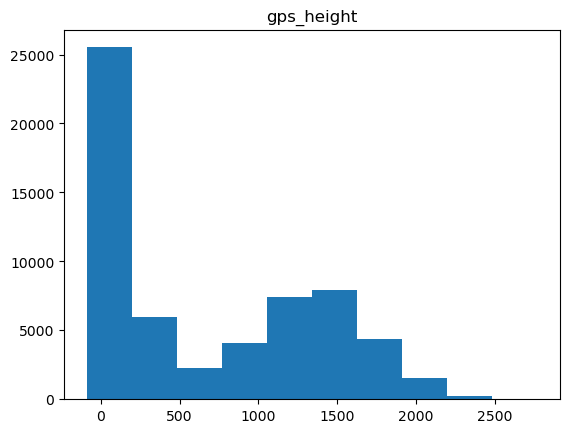

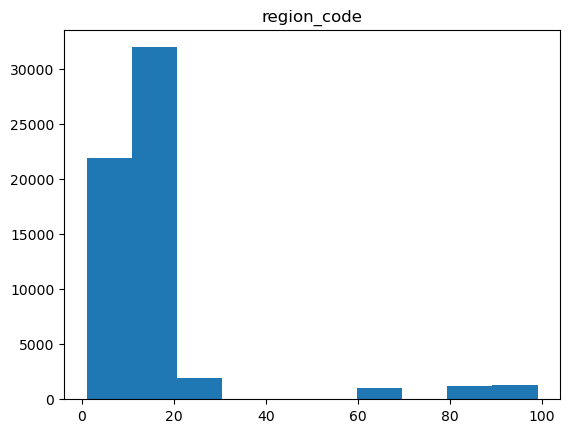

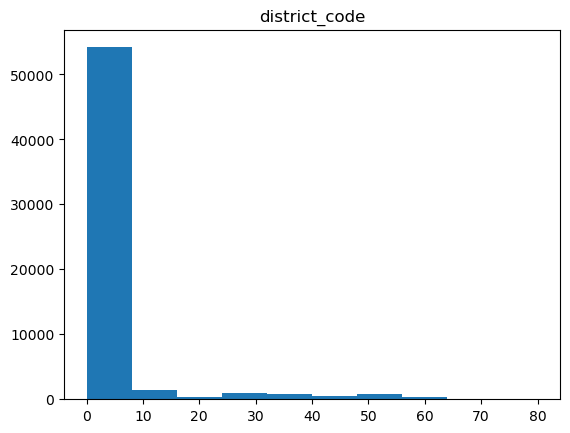

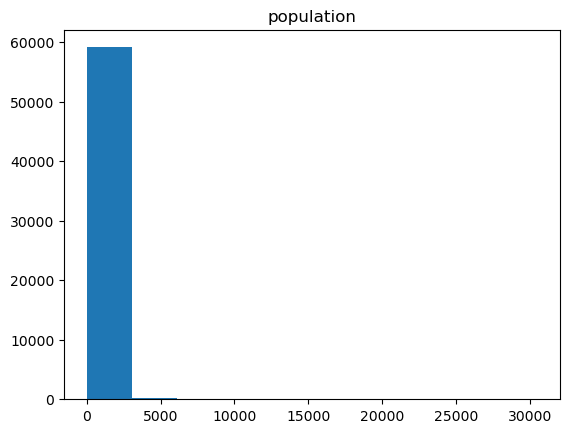

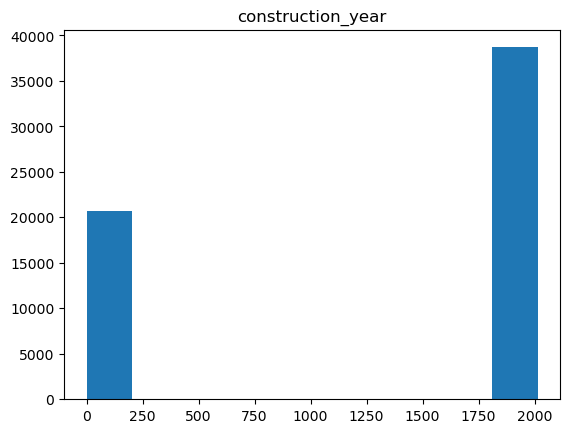

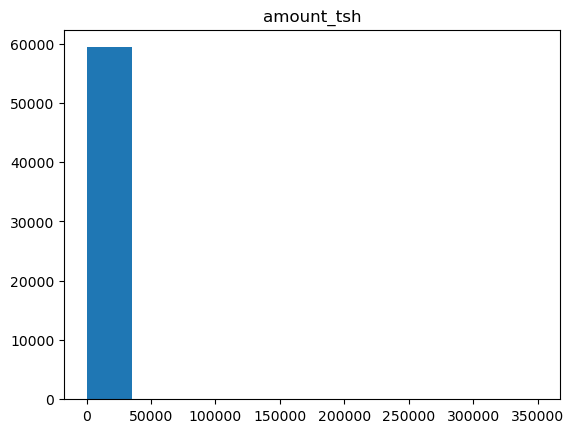

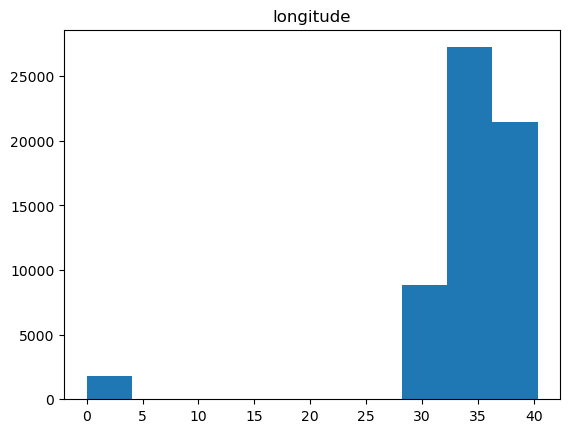

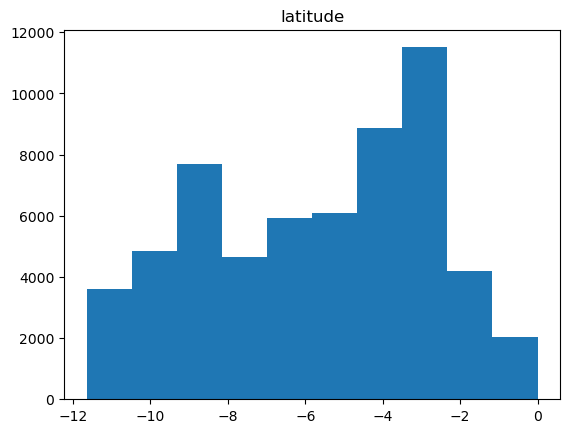

In [45]:
for l in lista_numericas:
    plt.hist(df_dataset[l])
    plt.title(l)
    plt.show()

In [46]:
df_dataset.isnull().sum()
#df_dataset.nunique()

id                           0
amount_tsh                   0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity

In [47]:
#limpieza de datos, lo que hago es sustituirlo por la moda.
df_dataset['funder'] = df_dataset['funder'].replace(np.nan, 'desconocido')
df_dataset['installer'] = df_dataset['installer'].replace(np.nan, 'DWE')
df_dataset['subvillage'] = df_dataset['subvillage'].replace(np.nan,'Madukani')
#df_dataset['public_meeting'] = df_dataset['public_meeting'].replace(np.nan,'True')
df_dataset['scheme_management'] = df_dataset['scheme_management'].replace(np.nan,'VWC')
df_dataset['scheme_name'] = df_dataset['scheme_name'].replace(np.nan,'K')
#df_dataset['permit'] = df_dataset['permit'].replace(np.nan,'False')

df_dataset['permit'].fillna(method='ffill', inplace=True)
df_dataset['public_meeting'].fillna(method='ffill', inplace=True)

In [48]:
#df_dataset.apply(lambda x: x.isna().sum()/x.count()*100)

In [49]:
df_data_test.permit.value_counts()

True     10262
False     4588
Name: permit, dtype: int64

In [50]:
df_dataset.permit.replace(('True','False'),
                         (0,1),inplace=True)

df_dataset.public_meeting.replace(('True','False'),
                         (0,1),inplace=True)

df_dataset.status_group.replace(('functional','non functional','functional needs repair'),
                                (0,1,2),inplace=True)

df_dataset.basin.replace(('Lake Victoria','Pangani','Rufiji','Internal','Lake Tanganyika','Wami / Ruvu','Lake Nyasa','Ruvuma / Southern Coast','Lake Rukwa'),
                                (0,1,2,3,4,5,6,7,8),inplace=True)

df_dataset.scheme_management.replace(('VWC','WUG','Water authority','WUA','Water Board','Parastatal','Private operator','Company','Other','SWC','Trust','None'),
                                (0,1,2,3,4,5,6,7,8,9,10,11),inplace=True)

df_dataset.extraction_type.replace(('gravity','nira/tanira','other','submersible','swn 80','mono','india mark ii','afridev','ksb','other - rope pump','other - swn 81','windmill','india mark iii','cemo','other - play pump','walimi','climax','other - mkulima/shinyanga'),
                                (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17),inplace=True)

#df_dataset.extraction_type.replace(('gravity','nira/tanira','other','submersible','swn 80','mono','india mark ii','afridev','ksb','other - rope pump','other - swn 81','windmill','india mark iii','cemo','other - play pump','walimi','climax','other - mkulima/shinyanga'),
                                #(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17),inplace=True)
    
df_dataset.extraction_type_group.replace(('gravity','nira/tanira','other','submersible','swn 80','mono','india mark ii','afridev','rope pump','other handpump','india mark iii','other motorpump','wind-powered'),
                                (0,1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

df_dataset.extraction_type_class.replace(('gravity','handpump','other','submersible','motorpump','rope pump','wind-powered'),
                                (0,1,2,3,4,5,6),inplace=True)

df_dataset.management.replace(('vwc','wug','water board','wua','private operator','parastatal','water authority','other','company','unknown','other - school','trust'),
                              (0,1,2,3,4,5,6,7,8,9,10,11),inplace=True)
                              
df_dataset.management_group.replace(('user-group','commercial','parastatal','other','unknown'),
                              (0,1,2,3,4),inplace=True)
                                
df_dataset.payment.replace(('never pay','pay per bucket','pay monthly','unknown','pay when scheme fails','pay annually','other'),
                              (0,1,2,3,4,5,6),inplace=True)

df_dataset.payment_type.replace(('never pay','per bucket','monthly','unknown','on failure','annually','other'),
                              (0,1,2,3,4,5,6),inplace=True)

df_dataset.water_quality.replace(('soft','salty','unknown','milky','coloured','salty abandoned','fluoride','fluoride abandoned'),
                              (0,1,2,3,4,5,6,7),inplace=True)

df_dataset.quality_group.replace(('good','salty','unknown','milky','colored','fluoride'),
                              (0,1,2,3,4,5),inplace=True)

df_dataset.quantity.replace(('enough','insufficient','unknown','dry','seasonal'),
                              (0,1,2,3,4),inplace=True)

df_dataset.quantity_group.replace(('enough','insufficient','unknown','dry','seasonal'),
                              (0,1,2,3,4),inplace=True)

df_dataset.source.replace(('spring','shallow well','machine dbh','river','rainwater harvesting','hand dtw','lake','dam','other','unknown'),
                          (0,1,2,3,4,5,6,7,8,9),inplace=True)

df_dataset.source_type.replace(('spring','shallow well','borehole','river/lake','rainwater harvesting','dam','other'),
                          (0,1,2,3,4,5,6),inplace=True)

df_dataset.source_class.replace(('groundwater','surface','unknown'),
                          (0,1,2),inplace=True)

df_dataset.waterpoint_type.replace(('communal standpipe','hand pump','other','communal standpipe multiple','improved spring','cattle trough','dam'),
                          (0,1,2,3,4,5,6),inplace=True)

df_dataset.waterpoint_type_group.replace(('communal standpipe','hand pump','other','improved spring','cattle trough','dam'),
                          (0,1,2,3,4,5),inplace=True)

In [51]:
le = LabelEncoder()

In [52]:
le.fit(df_dataset.funder.unique())
le.classes_

array(['0', 'A/co Germany', 'Aar', ..., 'Zinduka', 'Zingibali Secondary',
       'desconocido'], dtype=object)

In [53]:
df_dataset.funder = le.transform(df_dataset.funder)

In [54]:
le = LabelEncoder()

In [55]:
le.fit(df_dataset.installer.unique())
le.classes_

array(['-', '0', 'A.D.B', ..., 'world', 'world banks', 'world vision'],
      dtype=object)

In [56]:
df_dataset.installer = le.transform(df_dataset.installer)

In [57]:
le = LabelEncoder()

In [58]:
le.fit(df_dataset.subvillage.unique())
le.classes_

array(['##', "'A' Kati", '1', ..., 'Zunguni', 'Zunzuli', 'Zuri'],
      dtype=object)

In [59]:
df_dataset.subvillage = le.transform(df_dataset.subvillage)

In [60]:
le = LabelEncoder()

In [61]:
le.fit(df_dataset.region.unique())
le.classes_

array(['Arusha', 'Dar es Salaam', 'Dodoma', 'Iringa', 'Kagera', 'Kigoma',
       'Kilimanjaro', 'Lindi', 'Manyara', 'Mara', 'Mbeya', 'Morogoro',
       'Mtwara', 'Mwanza', 'Pwani', 'Rukwa', 'Ruvuma', 'Shinyanga',
       'Singida', 'Tabora', 'Tanga'], dtype=object)

In [62]:
df_dataset.region = le.transform(df_dataset.region)

In [63]:
le = LabelEncoder()

In [64]:
le.fit(df_dataset.lga.unique())
le.classes_

array(['Arusha Rural', 'Arusha Urban', 'Babati', 'Bagamoyo', 'Bahi',
       'Bariadi', 'Biharamulo', 'Bukoba Rural', 'Bukoba Urban', 'Bukombe',
       'Bunda', 'Chamwino', 'Chato', 'Chunya', 'Dodoma Urban', 'Geita',
       'Hai', 'Hanang', 'Handeni', 'Igunga', 'Ilala', 'Ileje', 'Ilemela',
       'Iramba', 'Iringa Rural', 'Kahama', 'Karagwe', 'Karatu', 'Kasulu',
       'Kibaha', 'Kibondo', 'Kigoma Rural', 'Kigoma Urban', 'Kilindi',
       'Kilolo', 'Kilombero', 'Kilosa', 'Kilwa', 'Kinondoni', 'Kisarawe',
       'Kishapu', 'Kiteto', 'Kondoa', 'Kongwa', 'Korogwe', 'Kwimba',
       'Kyela', 'Lindi Rural', 'Lindi Urban', 'Liwale', 'Longido',
       'Ludewa', 'Lushoto', 'Mafia', 'Magu', 'Makete', 'Manyoni',
       'Masasi', 'Maswa', 'Mbarali', 'Mbeya Rural', 'Mbinga', 'Mbozi',
       'Mbulu', 'Meatu', 'Meru', 'Misenyi', 'Missungwi', 'Mkinga',
       'Mkuranga', 'Monduli', 'Morogoro Rural', 'Morogoro Urban',
       'Moshi Rural', 'Moshi Urban', 'Mpanda', 'Mpwapwa', 'Mtwara Rural',
       'Mtw

In [65]:
df_dataset.lga= le.transform(df_dataset.lga)

In [66]:
le = LabelEncoder()

In [67]:
le.fit(df_dataset.ward.unique())
le.classes_

array(['Aghondi', 'Akheri', 'Arash', ..., 'Zombo', 'Zongomera', 'Zuzu'],
      dtype=object)

In [68]:
df_dataset.ward= le.transform(df_dataset.ward)

In [69]:
le = LabelEncoder()

In [70]:
le.fit(df_dataset.scheme_name.unique())
le.classes_

array(['14 Kambarage', 'A', 'ADP', ..., 'water supply at Nyakasungwa',
       'water supply in Mwanza', 'water supply in katungulu'],
      dtype=object)

In [71]:
df_dataset.scheme_name= le.transform(df_dataset.scheme_name)

In [72]:
le = LabelEncoder()

In [73]:
le.fit(df_dataset.wpt_name.unique())
le.classes_

array(['24', 'A Kulwa', 'A Saidi', ..., 'Zunzuli A Shuleni',
       'Zuwena Kindo', 'none'], dtype=object)

In [74]:
df_dataset.wpt_name= le.transform(df_dataset.wpt_name)

In [75]:
corr = abs(df_dataset.corr())
corr[['status_group']].sort_values(by = 'status_group',ascending = False).style.background_gradient()

,status_group
status_group,1.000000
quantity,0.200592
quantity_group,0.200592
waterpoint_type,0.166393
waterpoint_type_group,0.103556
gps_height,0.096408
payment_type,0.089617
payment,0.089617
region_code,0.083590
extraction_type_class,0.077282


In [76]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   funder                 59400 non-null  int32  
 3   gps_height             59400 non-null  int64  
 4   installer              59400 non-null  int32  
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  int32  
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  int64  
 10  subvillage             59400 non-null  int32  
 11  region                 59400 non-null  int32  
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  int32  
 15  wa

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df_dataset.drop('status_group',axis=1),
                                                    df_dataset.status_group,
                                                    test_size=0.2,
                                                    random_state=42,
                                                   stratify=df_dataset.status_group,
                                                   shuffle=True)

In [84]:
X_test

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
20613,72531,0.0,456,296,390,36.124987,-8.311514e+00,6909,0,2,...,0,0,0,0,0,3,3,1,0,0
31995,3323,0.0,1369,2407,297,34.272650,-9.307101e+00,37399,0,6,...,0,0,0,0,0,0,0,0,0,0
48257,15294,0.0,403,0,490,33.435959,-4.424756e+00,2683,0,3,...,0,0,0,0,0,4,4,1,1,1
19811,15200,0.0,1867,1626,390,36.626541,-3.268579e+00,11837,0,1,...,0,0,0,1,1,0,0,0,0,0
6328,6440,0.0,39,1599,390,29.749840,-4.569470e+00,5222,0,4,...,3,0,0,0,0,0,0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,58838,0.0,624,0,736,32.916846,-2.849225e+00,13525,0,0,...,0,0,0,0,0,2,2,0,1,1
53600,41952,0.0,1867,0,2048,33.788159,-3.330962e+00,27872,0,3,...,6,0,0,4,4,4,4,1,0,0
41146,3930,0.0,1897,1590,390,34.937231,-4.627034e+00,27798,0,3,...,6,2,2,3,3,1,1,0,2,2
36960,17830,0.0,345,0,390,0.000000,-2.000000e-08,30487,0,0,...,0,0,0,0,0,1,1,0,1,1


In [79]:
model1 = RandomForestClassifier().fit(X_train,y_train)
y_pred= model1.predict(df_data_test)

In [80]:
from sklearn.tree import DecisionTreeClassifier
model33 = DecisionTreeClassifier().fit(X_train,y_train)
y_pred33 = model33.predict(df_data_test)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc

def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2, average='macro'))
    print('recall')
    print(recall_score(y1, y2, average='macro'))
    print('f1')
    print(f1_score(y1, y2, average='macro'))
    print('classification report')
    print(classification_report(y1, y2))

In [82]:
saca_metricas(y_test, y_pred)

matriz de confusión


ValueError: Found input variables with inconsistent numbers of samples: [11880, 14850]

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
resultado = pd.DataFrame({'id': y_test.index, 'status_group': y_pred})
resultado['status_group'] = resultado['status_group'].replace({0: 'functional', 1: 'non functional', 2: 'functional needs repair'})
resultado.to_csv('predicciones.csv', index=False)

In [ ]:
feat_importances = pd.DataFrame(model1.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [ ]:
feat_importances

In [ ]:
def proporciones_final (var,target,df):

    proporcion = pd.DataFrame()
    
    proporcion['%depositos'] = df[target].groupby(df[var]).mean()*100
    proporcion['Conteo'] = df[target].groupby(df[var]).count()
    proporcion= proporcion.round(3)   
    proporcion_filtered = proporcion[(proporcion['%depositos']>0) & (proporcion['Conteo']>10)]
        
    if len(proporcion_filtered)<100 and len(proporcion_filtered)>1:
        fig = plt.figure()
        ax = proporcion_filtered['Conteo'].plot(kind='bar',grid=True)
                
        ax2 = ax.twinx()
        ax2.plot(proporcion_filtered['%depositos'].values, linestyle='-', linewidth=2.0,color='g')
        plt.tight_layout()        
    else:        
        proporcion_filtered.reset_index(inplace=True)
        sns.lmplot(x = var,y ='%depositos',data=proporcion_filtered, fit_reg=True,ci=None)    

In [ ]:
for i in df_dataset.columns:
    proporciones_final (i, 'status_group', df_dataset)

In [ ]:
selection = SelectKBest(k = 20)
feature_selection = selection.fit_transform(df_dataset, df_dataset['status_group'])

variables = list(np.asarray(list(df_dataset))[selection.get_support()])
variables.sort()
print(variables)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_dataset.drop('status_group',axis=1),
                                                    df_dataset.status_group,
                                                    test_size=0.2,
                                                    random_state=42,)

In [ ]:
model2 = RandomForestClassifier().fit(X_train,y_train)
y_pred = model2.predict(X_test)

In [ ]:
saca_metricas(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
#grid_param = {
#    'n_estimators': [30, 50, 100, 200],
#    'criterion': ['gini', 'entropy'],
#    'bootstrap': [True, False],
#    'max_depth': [20,22,24]
#}

In [ ]:
#model_grid = GridSearchCV(estimator=model2,
                    # param_grid=grid_param,
                    # scoring='f1',
                    # cv=5,
                    # n_jobs=-1)

In [ ]:
#model_grid.fit(X_train, y_train)print(classification_report(y_test, y_pred))

In [ ]:
#print(model_grid.best_params_)

In [ ]:
#print(model_grid.best_score_)

In [ ]:
#model3 = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=22, n_estimators=100).fit(X_train,y_train)
#y_pred = model3.predict(X_test)

In [ ]:
#saca_metricas(y_test, y_pred)

In [ ]:
#print(classification_report(y_test, y_pred))

In [ ]:
model2 = XGBClassifier().fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [ ]:
saca_metricas(y_test, y_pred)


In [ ]:
print(classification_report(y_test, y_pred))